In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 90% de los datos para entrenamiento y un 10% de los datos para validación
valid_idx  =  range ( len ( df ) - 29 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['SCL90_DEPRE', 'CAPE_POSIT_FREC', 'CAPE_DEPRE_FREC', 'CSI_EVITPROBL', 'CAPE_NEG_MALESTAR', 'CSI_RESPROBL', 'CAPE_DEPRE_MALESTAR', 'SCL90_ANS_FOB', 'SCL90_ANSIE', 'CSI_APOYOSOC', 'CSL90_SENS_INT', 'ESTRES_PERCIBIDO', 'CSI_REESTCOGN', 'TRAUMA_AFECTACION', 'CSI_EXPEMOC', 'CSL90_HOSTIL', 'ANSIEDADRASGO', 'CAPE_POS_MALESTAR', 'SCL90_OBS_COMP', 'CSI_PENSDESID', 'SCL90_PSICOT', 'SCL90_IDEA_PARAN', 'CSI_RETISOC', 'SCL90_SOMAT', 'TRAUMA_FRECUENCIA', 'CSI_AUTOCRIT', 'CAPE_NEG_FREC']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.950999 -0.623599 -0.579377  2.083213 ... -0.576324 -1.121451 -0.73529  -0.777014]
 [-0.231921  1.094641 -0.114791 -0.772763 ... -0.672691 -0.459762 -0.73529  -0.376025]
 [-0.471614 -0.311192  0.117502 -0.333382 ... -0.576324 -0.554289 -0.559012  0.158627]
 [ 1.845418 -0.467395  0.582089  0.105999 ...  2.218304  2.659629  0.67493   1.094269]
 [ 1.445929  0.62603   0.814382  0.325689 ...  1.543738  2.186994  0.146098  1.094269]]
[0 1 1 1 1]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.911030,0.852521,0.724138,07:20
1,0.779596,0.818006,0.689655,03:17
2,0.680404,0.767784,0.655172,02:39
3,0.599255,0.735884,0.655172,02:42
4,0.532800,0.746199,0.655172,02:36
5,0.473552,0.713206,0.655172,02:35
6,0.421905,0.806332,0.655172,02:34
7,0.381072,0.751204,0.758621,02:33
8,0.340311,0.785784,0.758621,02:33
9,0.302606,0.878617,0.758621,02:42


SCL90_DEPRE,CAPE_POSIT_FREC,CAPE_DEPRE_FREC,CSI_EVITPROBL,CAPE_NEG_MALESTAR,CSI_RESPROBL,CAPE_DEPRE_MALESTAR,SCL90_ANS_FOB,SCL90_ANSIE,CSI_APOYOSOC,CSL90_SENS_INT,ESTRES_PERCIBIDO,CSI_REESTCOGN,TRAUMA_AFECTACION,CSI_EXPEMOC,CSL90_HOSTIL,ANSIEDADRASGO,CAPE_POS_MALESTAR,SCL90_OBS_COMP,CSI_PENSDESID,SCL90_PSICOT,SCL90_IDEA_PARAN,CSI_RETISOC,SCL90_SOMAT,TRAUMA_FRECUENCIA,CSI_AUTOCRIT,CAPE_NEG_FREC,target,prediction
0.1676,0.3136,0.5821,-0.7728,0.8558,-1.2916,1.1100,0.5898,0.2722,-1.4423,0.4778,-0.1090,-0.5802,0.9432,-0.7875,0.2362,0.0405,1.0705,0.1826,-0.7319,1.1624,-0.1294,0.2267,-0.0945,1.0527,-0.3827,0.6933,2,1
-0.6314,-0.4674,0.3498,-1.4318,2.0357,-2.0915,1.1100,-0.6964,-0.4465,0.4289,-0.2051,1.9171,-1.1338,-0.1727,-0.5962,-0.1974,-0.2659,-0.0131,0.2888,-0.3960,-0.5814,-0.3251,-1.0491,-0.5763,-0.4598,-1.0878,0.6933,0,1
-0.9510,-0.4674,-0.3471,-0.7728,0.5835,1.3080,-0.3965,-0.6964,-0.5662,0.5990,-0.7514,-0.5857,0.7116,-0.3444,-0.7875,-0.8476,0.1938,-0.2298,-0.7731,-1.9074,-0.8497,-0.7164,-0.1986,-0.6727,-0.6488,-0.9116,0.2923,0,0
1.1263,-0.6236,-0.3471,-0.5531,-1.0504,-0.8917,-0.6703,-0.1451,0.7513,-0.7619,0.8875,-0.1090,-0.7647,0.0419,-0.4049,1.3199,-0.7256,-0.7716,0.1826,-0.8998,-0.4473,-0.1294,-0.4112,1.0619,1.0527,-1.2641,-0.1087,2,0
-0.5515,-0.3112,0.3498,0.3257,0.4019,-1.6916,0.6991,-0.1451,-0.2069,-0.2515,-0.2051,-0.1090,-0.2111,-1.0740,-0.9788,-0.4141,-0.8788,-0.1214,0.1826,-0.7319,0.0893,-0.9120,-0.8365,-0.4800,-1.1215,-1.0878,-0.1087,1,1


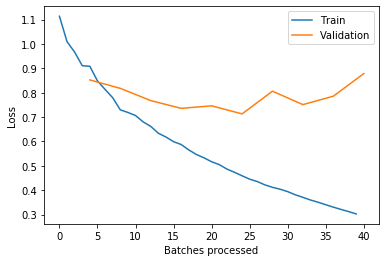

In [10]:
learn.recorder.plot_losses()
learn.show_results()